In [ ]:
import math
import matplotlib.pyplot as plt
import numpy as np
from scipy.interpolate import make_interp_spline
import os

In [2]:
def smoothing(arr):
    x = np.array([i for i in range(len(arr))])
    y = np.array(arr)
    spline = make_interp_spline(x, y)
    x = np.linspace(x.min(), x.max(), 500)
    y = spline(x)
    return x, y

def plot_non_predictable(bad_percentage, length):
    plt.figure(figsize=(9, 6))
    plt.title('Non predictable, %')
    for noise, d in bad_percentage.items():
        for size, stat in d.items():
            x_, y_ = smoothing(stat[:length])
            plt.plot(x_, y_, label='noise={n}, size={s}'.format(n=noise, s=size))
    plt.xticks([y for y in range(0, length + 1, length // 10)])
    plt.yticks([y for y in range(0, 101, 10)])
    plt.legend(title='Noise coefficient')
    plt.xlabel('Steps')
    plt.ylabel('% of non predictable points')

In [3]:
def make_calculations(coefs, lens):
    stat_np = dict()

    for noise in coefs:
        stat_np[noise] = dict()
        for size in lens:
            filename = "results/results_" + str(size) + "_" + str(noise) + ".npy"
            if os.path.isfile(filename):
                print("loading for noise, size:", noise, size)
                stat_np[noise][size] = np.load(filename, allow_pickle=True)
                print(stat_np[noise][size][90:100])
            else:
                print("please, recalc on supercomputer for noise, size:", noise, size)
    return stat_np

loading for noise, size: 0.0 1000
[100.0 100.0 100.0 100.0 100.0 100.0 100.0 100.0 100.0 100.0]
loading for noise, size: 0.01 1000
[100.0 100.0 100.0 100.0 100.0 100.0 100.0 100.0 100.0 100.0]
loading for noise, size: 0.02 1000
[100.0 100.0 100.0 100.0 100.0 100.0 100.0 100.0 100.0 100.0]
loading for noise, size: 0.03 1000
[100.0 100.0 100.0 100.0 100.0 100.0 100.0 100.0 100.0 100.0]


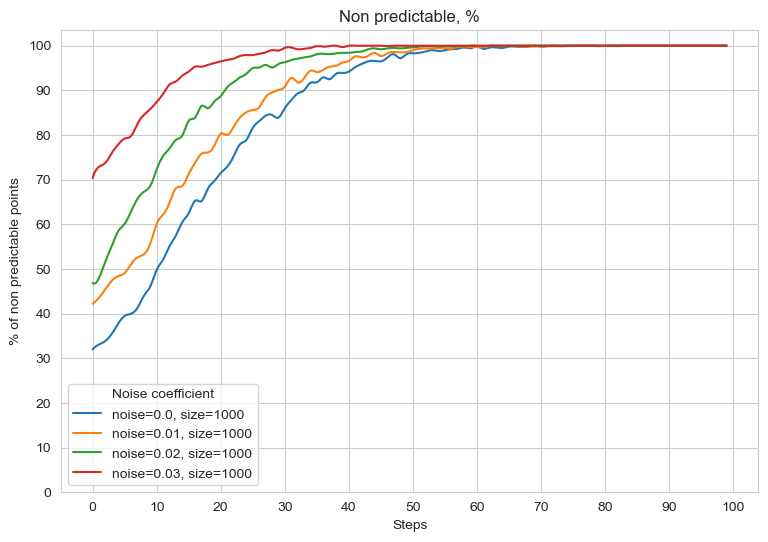

In [4]:
noises = [0.0, 0.01, 0.02, 0.03]
sizes = [1000]

stat_np = make_calculations(noises, sizes)
plot_non_predictable(stat_np, 100)

loading for noise, size: 0.0 2000
[99.7 99.7 99.7 99.7 99.8 99.9 99.9 99.8 99.8 99.7]
loading for noise, size: 0.01 2000
[100.0 99.9 99.9 100.0 100.0 100.0 100.0 100.0 100.0 99.9]
loading for noise, size: 0.02 2000
[100.0 100.0 100.0 100.0 100.0 100.0 100.0 100.0 100.0 100.0]
loading for noise, size: 0.03 2000
[100.0 100.0 100.0 100.0 100.0 100.0 100.0 100.0 100.0 100.0]


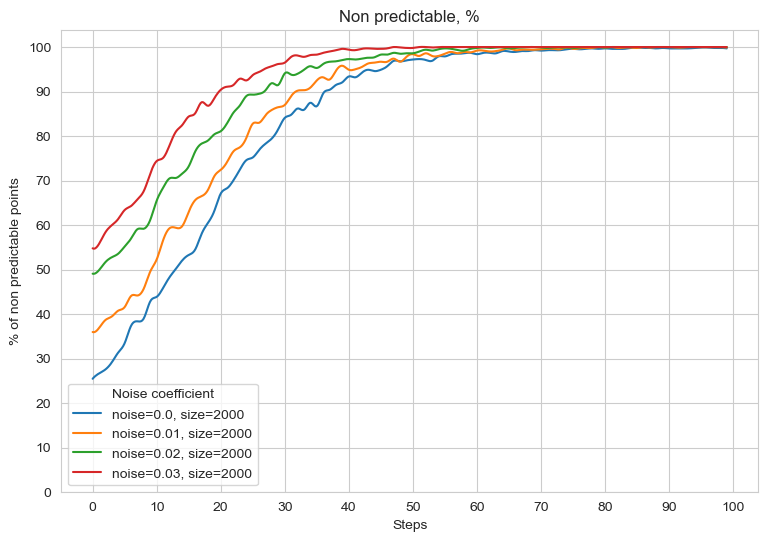

In [5]:
noises = [0.0, 0.01, 0.02, 0.03]
sizes = [2000]

stat_np = make_calculations(noises, sizes)
plot_non_predictable(stat_np, 100)

loading for noise, size: 0.0 4000
[98.8 98.8 98.5 99.1 99.5 99.2 99.4 99.6 99.7 99.4]
loading for noise, size: 0.01 4000
[99.7 99.5 99.6 99.4 99.7 99.8 99.8 99.6 99.8 99.8]
loading for noise, size: 0.02 4000
[100.0 100.0 100.0 100.0 100.0 100.0 100.0 100.0 100.0 100.0]
loading for noise, size: 0.03 4000
[100.0 100.0 100.0 100.0 100.0 100.0 100.0 100.0 100.0 100.0]


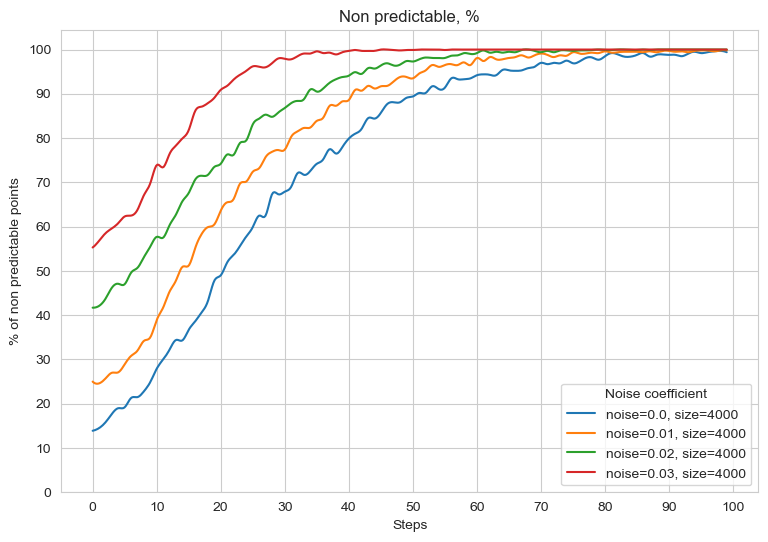

In [6]:
noises = [0.0, 0.01, 0.02, 0.03]
sizes = [4000]

stat_np = make_calculations(noises, sizes)
plot_non_predictable(stat_np, 100)

loading for noise, size: 0.0 8000
[98.1 97.89999999999999 98.0 97.8 98.0 98.3 98.9 98.5 98.5 98.9]
loading for noise, size: 0.01 8000
[98.8 99.0 99.0 99.1 99.6 99.5 99.2 99.5 99.6 99.5]
loading for noise, size: 0.02 8000
[100.0 100.0 100.0 99.9 100.0 100.0 99.9 99.9 99.9 100.0]
loading for noise, size: 0.03 8000
[100.0 100.0 100.0 100.0 99.9 100.0 100.0 100.0 100.0 100.0]


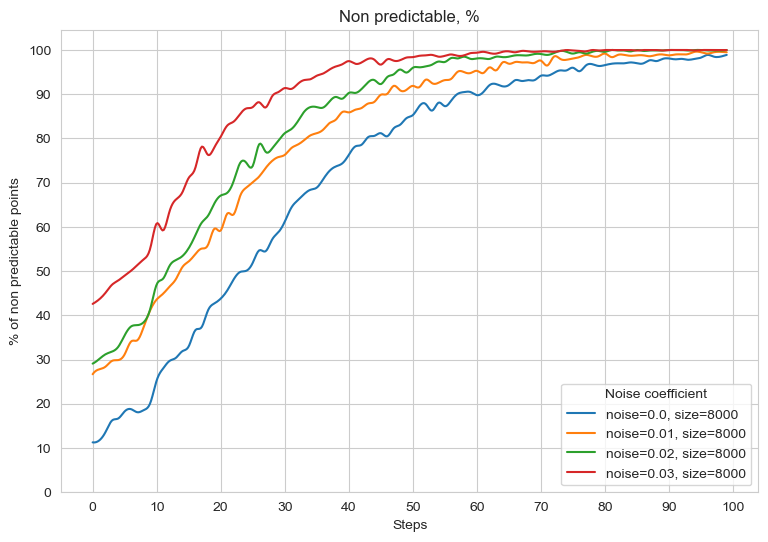

In [7]:
noises = [0.0, 0.01, 0.02, 0.03]
sizes = [8000]

stat_np = make_calculations(noises, sizes)
plot_non_predictable(stat_np, 100)

loading for noise, size: 0.0 1000
[100.0 100.0 100.0 100.0 100.0 100.0 100.0 100.0 100.0 100.0]
loading for noise, size: 0.0 2000
[99.7 99.7 99.7 99.7 99.8 99.9 99.9 99.8 99.8 99.7]
loading for noise, size: 0.0 4000
[98.8 98.8 98.5 99.1 99.5 99.2 99.4 99.6 99.7 99.4]
loading for noise, size: 0.0 8000
[98.1 97.89999999999999 98.0 97.8 98.0 98.3 98.9 98.5 98.5 98.9]


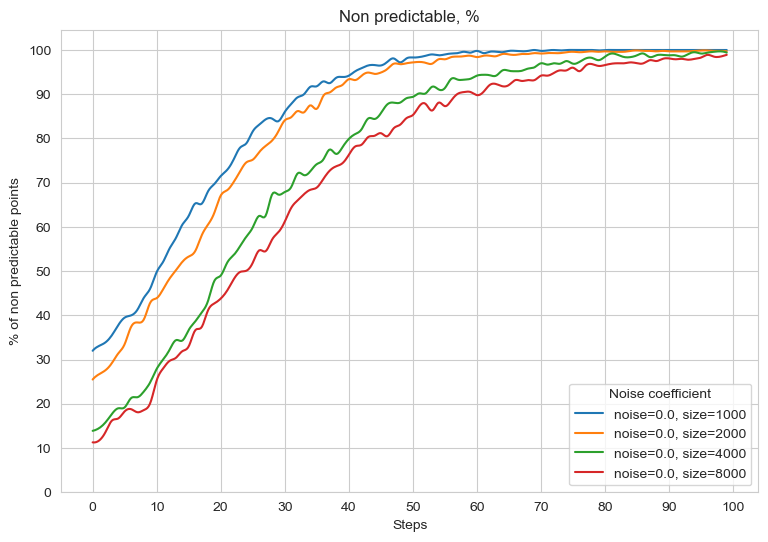

In [8]:
noises = [0.0]
sizes = [1000, 2000, 4000, 8000]

stat_np = make_calculations(noises, sizes)
plot_non_predictable(stat_np, 100)

In [9]:
def make_calculations_v2(pairs):
    stat_np = dict()

    for pair in pairs:
        noise = pair[0]
        size = pair[1]
        if noise not in stat_np:
            stat_np[noise] = dict()
        stat_np[noise][size] = []
        filename = "results/results_" + str(size) + "_" + str(noise) + ".npy"
        if os.path.isfile(filename):
            print("loading for noise, size:", noise, size)
            stat_np[noise][size] = np.load(filename, allow_pickle=True)
        else:
            print("please, recalc on supercomputer for noise, size:", noise, size)
    return stat_np

loading for noise, size: 0.0 4000
loading for noise, size: 0.0 8000
loading for noise, size: 0.01 8000
loading for noise, size: 0.02 8000
loading for noise, size: 0.03 8000


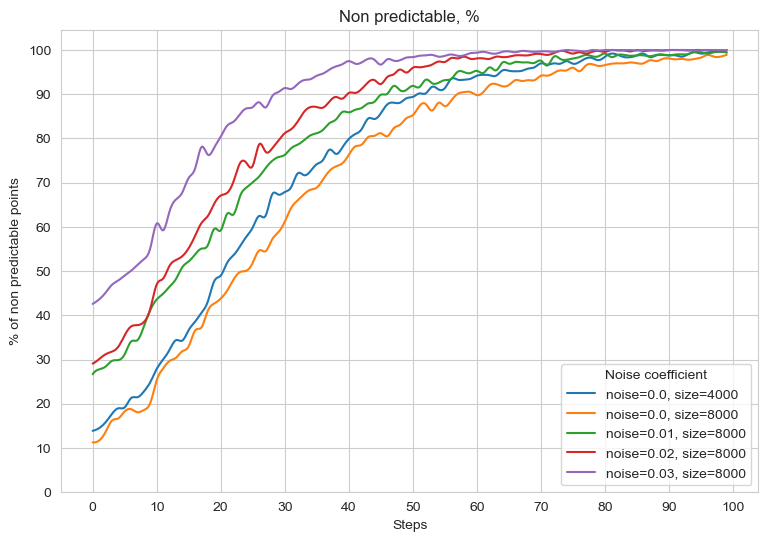

In [11]:
pairs = [
    [0.0, 4000],
    [0.0, 8000],
    [0.01, 8000],
    [0.02, 8000],
    [0.03, 8000],
]

stat_np = make_calculations_v2(pairs)
plot_non_predictable(stat_np, 100)

loading for noise, size: 0.0 1000
loading for noise, size: 0.0 4000
loading for noise, size: 0.01 4000
loading for noise, size: 0.02 4000
loading for noise, size: 0.03 4000


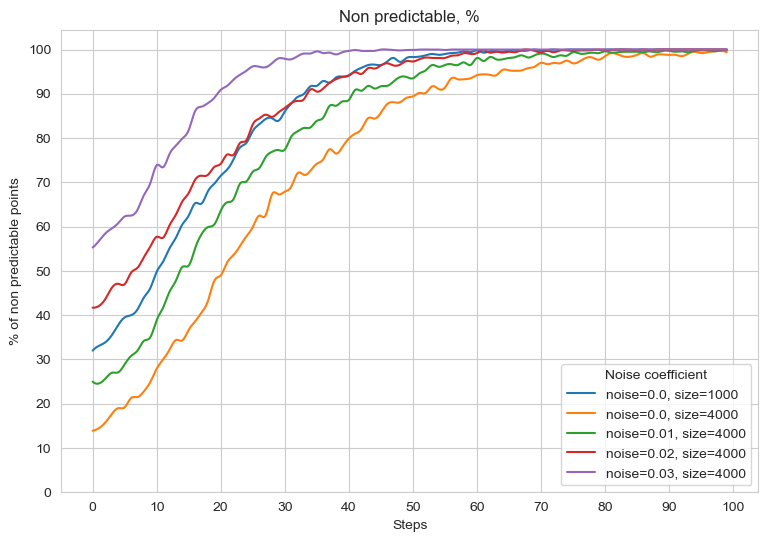

In [17]:
pairs = [
    [0.0, 1000],
    [0.0, 4000],
    [0.01, 4000],
    [0.02, 4000],
    [0.03, 4000],
]

stat_np = make_calculations_v2(pairs)
plot_non_predictable(stat_np, 100)

loading for noise, size: 0.0 1000
loading for noise, size: 0.0 2000
loading for noise, size: 0.01 2000
loading for noise, size: 0.02 2000
loading for noise, size: 0.03 2000


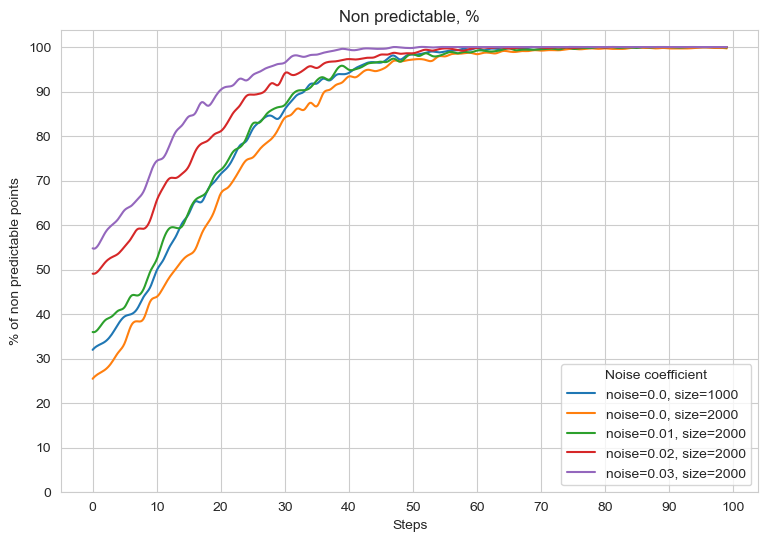

In [13]:
pairs = [
    [0.0, 1000],
    [0.0, 2000],
    [0.01, 2000],
    [0.02, 2000],
    [0.03, 2000],
]

stat_np = make_calculations_v2(pairs)
plot_non_predictable(stat_np, 100)

AttributeError: 'int' object has no attribute 'get_ybound'

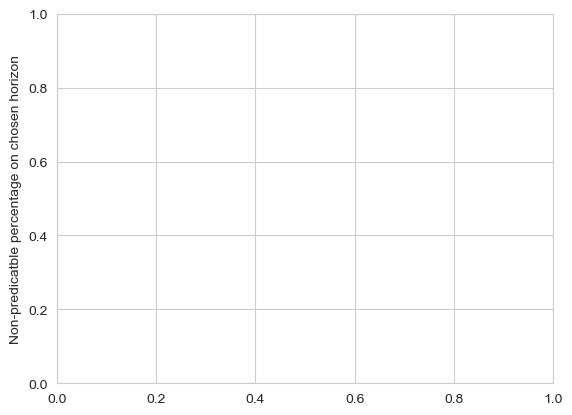

In [66]:
sizes = [1000, 2000, 4000, 8000]
noise = 0.03
horizon = 20

xs = sizes
ys = []
for size in sizes:
    filename = "results/results_" + str(size) + "_" + str(noise) + ".npy"
    if os.path.isfile(filename):
        stat_np[noise][size] = np.load(filename, allow_pickle=True)
        ys.append(stat_np[noise][size][horizon])

import matplotlib
plt.ylabel('Non-predicatble percentage on chosen horizon')
matplotlib.axes.Axes.set_ybound(0, 100)
plt.scatter(xs, ys)
plt.title("Horizon = {hz}, noise = {noise}".format(hz = horizon, noise = noise))


In [ ]:
DTW dynamical time warping